**Очень много коллинеарных признаков. Их необходимо удалить.**

**Feature selector** - это инструмент для уменьшения размерности наборов данных машинного обучения.

Существует пять методов, используемых для определения объектов для удаления:

   - Отсутствующие значения
   - Одиночные уникальные значения
   - Коллинеарные признаки
   - Признаки нулевой важности
   - Признаки с низкой важностью

https://github.com/WillKoehrsen/feature-selector

In [1]:
# требуется установка библиотеки LightGBM
#!pip install lightgbm

In [2]:
from feature_selector.feature_selector import FeatureSelector

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn
%matplotlib inline

Загружаем датасеты. Так как они все идентичные, то будем анализировать один.

In [4]:
df = pd.read_csv('database/df_2019_full.csv')
target = pd.read_csv('database/target_2019_01_full.csv')
target = target['target_2019 01']

In [5]:
fs = FeatureSelector(data=df, labels=target)

**Коллинеарность признаков**

In [6]:
# Находим коллинеарные признаки с коллинеарностью выше 0,85
fs.identify_collinear(correlation_threshold=0.85)

125 features with a correlation magnitude greater than 0.85.



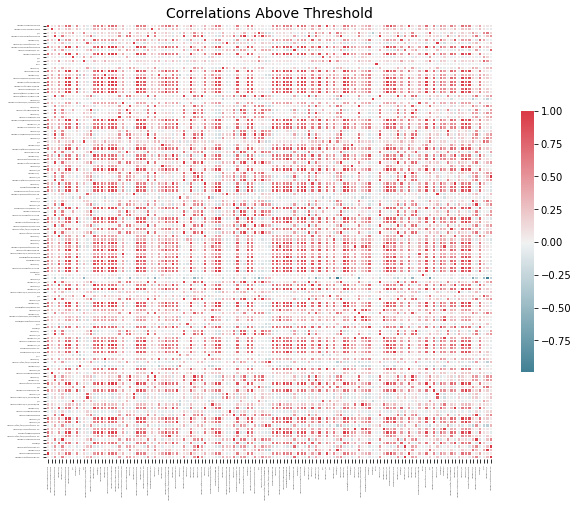

In [7]:
fs.plot_collinear()

Список признаков, которые отобраны для удаления. Запишем в файл.

In [8]:
collinear_fetures = fs.ops['collinear']

In [9]:
# Запись в файл списка признаков
file = open('feature_list/2019/fs_collinear.txt', 'w')
for index in collinear_fetures:
     file.write(index + '\n')
file.close()

Таблица коллинеарности 

In [10]:
df_collinear = fs.record_collinear
df_collinear['corr_value_abs'] = df_collinear['corr_value'].abs()
df_collinear.sort_values('corr_value_abs', ascending=False).head(20)

,drop_feature,corr_feature,corr_value,corr_value_abs
10,Факт 12,Факт 1,1.000000,1.000000
9,Факт 28,Факт 24,1.000000,1.000000
297,Темп прироста 2 f1_690,"Темп прироста 2 Краткосрочные обязательства, RUB",0.999843,0.999843
269,Темп роста 2 f1_690,"Темп роста 2 Краткосрочные обязательства, RUB",0.999828,0.999828
315,Ускорение f1_690,"Ускорение Краткосрочные обязательства, RUB",0.999758,0.999758
437,Темп прироста 2 f1_190,"Темп прироста 2 Внеоборотные активы, RUB",0.999688,0.999688
427,Темп роста 2 f1_190,"Темп роста 2 Внеоборотные активы, RUB",0.999660,0.999660
445,Ускорение f1_190,"Ускорение Внеоборотные активы, RUB",0.999634,0.999634
285,Темп прироста 1 f1_690,"Темп прироста 1 Краткосрочные обязательства, RUB",0.999617,0.999617
258,Темп роста 1 f1_690,"Темп роста 1 Краткосрочные обязательства, RUB",0.999593,0.999593


**Важность признаков**

Признаки с нулевой важностью 

In [11]:
fs.identify_zero_importance(task='classification', eval_metric='f1', n_iterations=10, early_stopping=False)
zero_importance_features = fs.ops['zero_importance']
print('Признаки с нулевой значимостью:\n', zero_importance_features)

Training Gradient Boosting Model


29 features with zero importance after one-hot encoding.

Признаки с нулевой значимостью:
 ['Факт 27', 'Факт 33', 'Факт 7', 'Факт 3', 'Факт 2', 'Темп прироста 1 Уставный капитал , RUB', 'Темп прироста 2 Уставный капитал , RUB', 'Ускорение Уставный капитал , RUB', 'Факт 12', 'Факт 1', 'Факт 14', 'Факт 39', 'Факт 37', 'Факт 58', 'Факт 57', 'Факт 55', 'Факт 51', 'Факт 50', 'Факт 48', 'Факт 42', 'Факт 41', 'Факт 40', 'Факт 30', 'Факт 28', 'Факт 32', 'Факт 31', 'Факт 23', 'Факт 24', 'Факт 46']


В основном это разные факты, но какие именно - знаем только номера. Сохраним их в файл.

In [12]:
# Запись в файл списка признаков
file = open('feature_list/2019/fs_zero.txt', 'w')
for index in zero_importance_features:
     file.write(index + '\n')
file.close()

График важности признаков

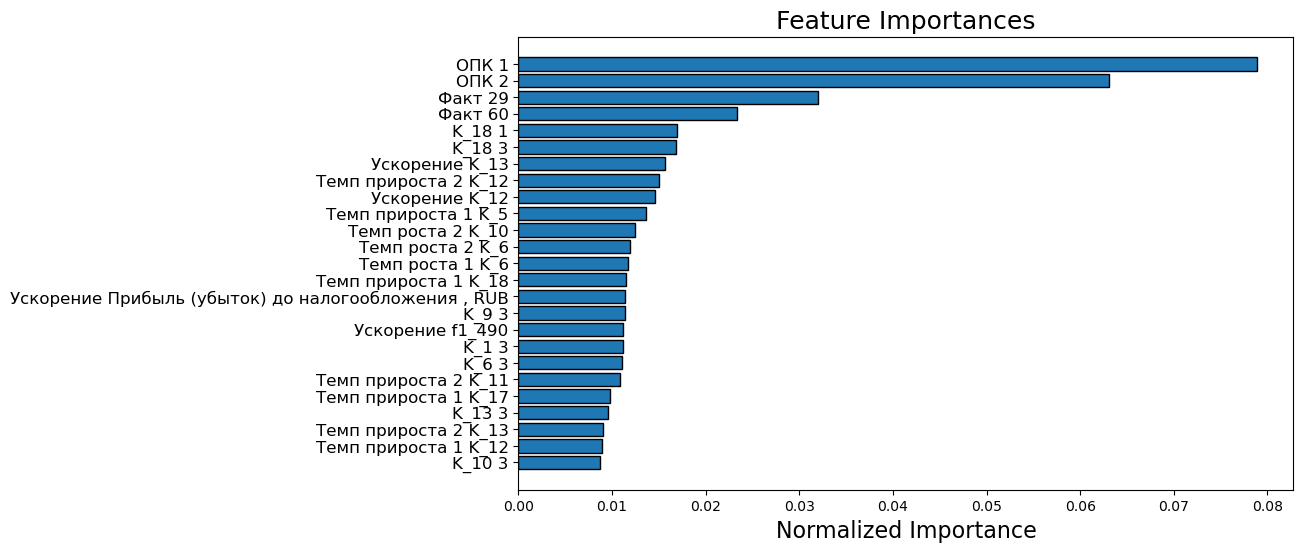

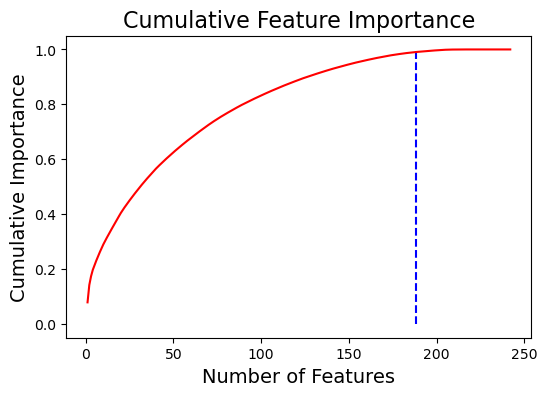

188 features required for 0.99 of cumulative importance


In [13]:
fs.plot_feature_importances(plot_n=25, threshold=0.99)

Этот метод отбора данных выделил как самые важные "Оценки потенциала контрагента 1 и 2"

Разделение признаков:

In [14]:
fs.identify_low_importance(cumulative_importance=0.99)

187 features required for cumulative importance of 0.99 after one hot encoding.
55 features do not contribute to cumulative importance of 0.99.



In [15]:
df_f_importances_with_collinearity = fs.feature_importances

In [16]:
df_f_importances_with_collinearity.to_csv('database/df_f_importances_with_collinearity_2019.csv', index=False)

**Теперь попробуем удалить коллинеарные признаки и посмотреть на изменение важности признаков**

In [17]:
df_drop_collinear = df.drop(collinear_fetures, axis=1)

In [18]:
fs = FeatureSelector(data=df_drop_collinear, labels=target)

Признаки с нулевой важностью 

In [19]:
fs.identify_zero_importance(task='classification', eval_metric='f1', n_iterations=10, early_stopping=False)
zero_importance_features = fs.ops['zero_importance']
print('Признаки с нулевой значимостью:\n', zero_importance_features)

Training Gradient Boosting Model


24 features with zero importance after one-hot encoding.

Признаки с нулевой значимостью:
 ['Факт 14', 'Факт 7', 'Факт 32', 'Факт 31', 'Факт 23', 'Факт 24', 'Факт 27', 'Факт 33', 'Факт 30', 'Факт 40', 'Факт 41', 'Факт 42', 'Факт 46', 'Факт 48', 'Факт 50', 'Факт 51', 'Факт 55', 'Факт 57', 'Факт 58', 'Факт 37', 'Факт 39', 'Факт 1', 'Факт 2', 'Факт 3']


График важности признаков

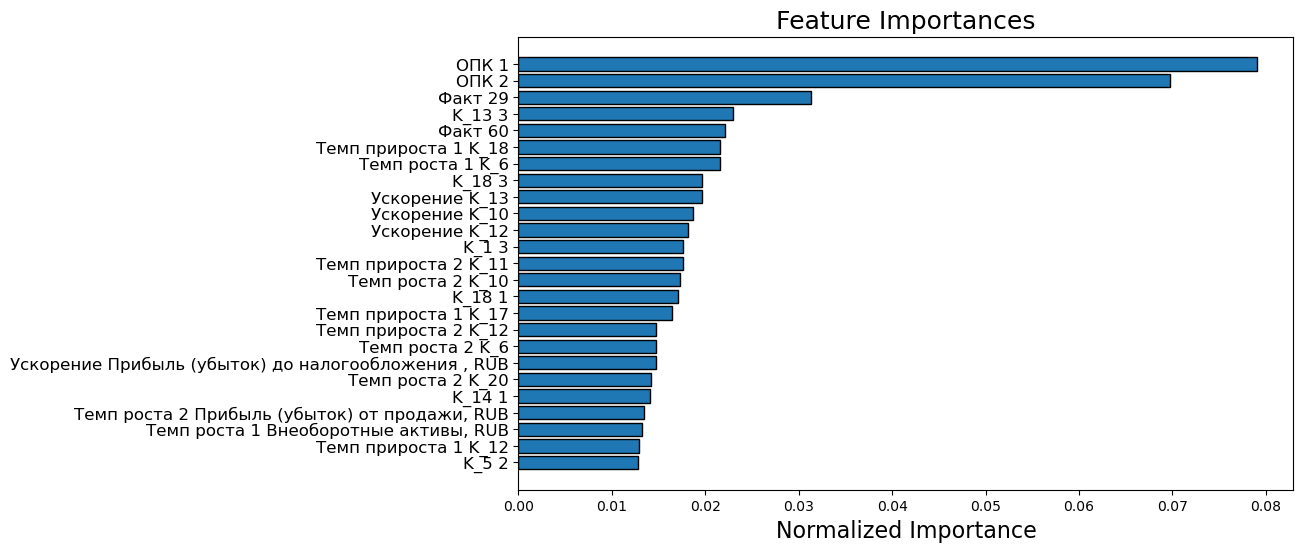

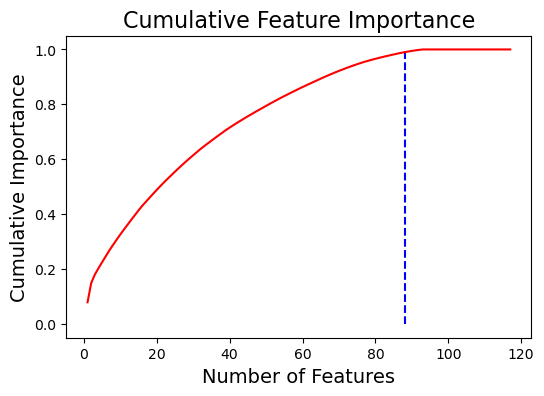

88 features required for 0.99 of cumulative importance


In [20]:
fs.plot_feature_importances(plot_n=25, threshold=0.99)

Немного перемешался порядок, но в первых рядах практически теже признаки. 

In [21]:
fs.identify_low_importance(cumulative_importance=0.99)

87 features required for cumulative importance of 0.99 after one hot encoding.
30 features do not contribute to cumulative importance of 0.99.



In [22]:
df_f_importances_without_collinearity = fs.feature_importances

In [23]:
df_f_importances_without_collinearity.to_csv('database/df_f_importances_without_collinearity_2019.csv', index=False)

In [24]:
index = df_f_importances_without_collinearity[df_f_importances_without_collinearity['importance'] == 0].index 
importance_features=df_f_importances_without_collinearity.drop(index, axis=0)
importance_features = importance_features.sort_values('importance', ascending=False)

importance_features = list(importance_features['feature'])

In [25]:
# Запись в файл списка признаков
file = open('feature_list/2019/fs_importances.txt', 'w')
for index in importance_features:
     file.write(index + '\n')
file.close()